In [95]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
import numpy as np 
import matplotlib.pyplot as plt

btc_data = pd.read_csv('../../filtered_data/eth_hr_filtered.csv')
btc_data

,ID,Date,Price (GBP),Market Cap (GBP),Total Volume,% 24hr Change,% 7d Change,Class
0,1,2023-05-12 19:00:43,1422.537632,1.710103e+11,7.404078e+09,0.00,0.00,stay the same
1,2,2023-05-12 20:00:01,1422.698065,1.727088e+11,7.128531e+09,0.01,0.00,increase
2,3,2023-05-12 21:00:37,1436.936059,1.727841e+11,8.134852e+09,1.00,0.00,increase
3,4,2023-05-12 22:00:41,1449.553316,1.745663e+11,8.240521e+09,0.88,0.00,increase
4,5,2023-05-12 23:00:52,1449.475989,1.742240e+11,8.256760e+09,-0.01,0.00,decrease
...,...,...,...,...,...,...,...,...
2158,2159,2023-08-10 15:00:22,1453.695490,1.742574e+11,3.788152e+09,-0.25,0.24,decrease
2159,2160,2023-08-10 16:01:01,1456.247509,1.748472e+11,4.014723e+09,0.18,0.37,increase
2160,2161,2023-08-10 17:01:27,1455.013815,1.749402e+11,3.599925e+09,-0.08,0.37,decrease
2161,2162,2023-08-10 18:00:43,1455.852401,1.749664e+11,3.761659e+09,0.06,0.37,increase


In [96]:
from sklearn.preprocessing import LabelEncoder

# Assuming you have a target label column named 'target' in your DataFrame
label_encoder = LabelEncoder()
btc_data['Class'] = label_encoder.fit_transform(btc_data['Class'])

# Get the mapping between the encoded labels and the original classes
label_mapping = dict(zip(range(len(label_encoder.classes_)), label_encoder.classes_))

# Print the mapping
for encoded_label, original_class in label_mapping.items():
    print(f"Encoded Label: {encoded_label} --> Original Class: {original_class}")
    
btc_data

Encoded Label: 0 --> Original Class: decrease
Encoded Label: 1 --> Original Class: increase
Encoded Label: 2 --> Original Class: stay the same


,ID,Date,Price (GBP),Market Cap (GBP),Total Volume,% 24hr Change,% 7d Change,Class
0,1,2023-05-12 19:00:43,1422.537632,1.710103e+11,7.404078e+09,0.00,0.00,2
1,2,2023-05-12 20:00:01,1422.698065,1.727088e+11,7.128531e+09,0.01,0.00,1
2,3,2023-05-12 21:00:37,1436.936059,1.727841e+11,8.134852e+09,1.00,0.00,1
3,4,2023-05-12 22:00:41,1449.553316,1.745663e+11,8.240521e+09,0.88,0.00,1
4,5,2023-05-12 23:00:52,1449.475989,1.742240e+11,8.256760e+09,-0.01,0.00,0
...,...,...,...,...,...,...,...,...
2158,2159,2023-08-10 15:00:22,1453.695490,1.742574e+11,3.788152e+09,-0.25,0.24,0
2159,2160,2023-08-10 16:01:01,1456.247509,1.748472e+11,4.014723e+09,0.18,0.37,1
2160,2161,2023-08-10 17:01:27,1455.013815,1.749402e+11,3.599925e+09,-0.08,0.37,0
2161,2162,2023-08-10 18:00:43,1455.852401,1.749664e+11,3.761659e+09,0.06,0.37,1


In [97]:
selected_columns= btc_data.iloc[:, [2, 3, 4, 5, 6, 7]]

# Split the data into features (X) and target label (y)
X= selected_columns.iloc[:, :-1]  # Features (columns 2, 3, 4)
y= selected_columns.iloc[:, -1]   # Target label (column 7)# Standardize the data

In [98]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [99]:
#NB MODEL
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

In [100]:
from sklearn.model_selection import cross_val_score

# Initialize the base classifier (naive Bayes in this case)
base_classifier = GaussianNB()

# Initialize the AdaBoost classifier
boosted_classifier = AdaBoostClassifier(base_estimator=base_classifier, n_estimators=50, random_state=42)

# Train the boosted classifier
boosted_classifier.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = boosted_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Perform cross-validation
cv_scores = cross_val_score(boosted_classifier, X_normalized, y, cv=10)  # 10-fold cross-validation

# Print the cross-validation scores
print("\nCross-Validation Scores:\n", cv_scores)
print("\nMean Accuracy:", np.mean(cv_scores))

Accuracy: 0.5408320493066255


/Users/miguelremedios/opt/anaconda3/envs/thesis/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/miguelremedios/opt/anaconda3/envs/thesis/lib/python3.11/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 7 members, which is less than n_splits=10.
  warnings.warn(
/Users/miguelremedios/opt/anaconda3/envs/thesis/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/miguelremedios/opt/anaconda3/envs/thesis/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/miguelremedios/opt/anaconda3/envs/thesis/lib/python3.11/site-packages/sklearn/ensem


Cross-Validation Scores:
 [0.49769585 0.49769585 0.50230415 0.55092593 0.55092593 0.51851852
 0.50462963 0.48611111 0.50925926 0.5       ]

Mean Accuracy: 0.5118066222904932


/Users/miguelremedios/opt/anaconda3/envs/thesis/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Users/miguelremedios/opt/anaconda3/envs/thesis/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


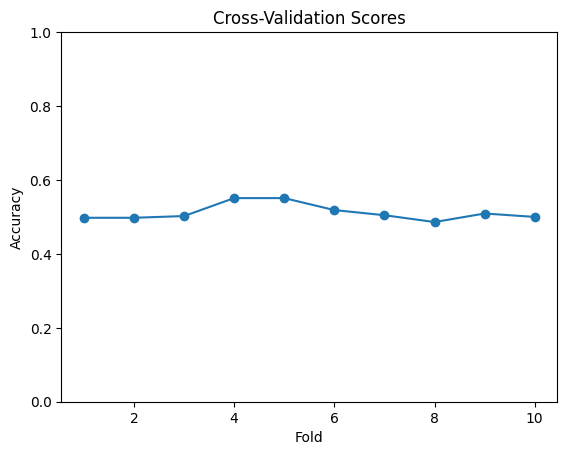

In [101]:
# Plot the cross-validation scores
plt.plot(np.arange(1, 11), cv_scores, marker='o')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Scores')
plt.ylim([0, 1])  # Set the y-axis limits
plt.show()

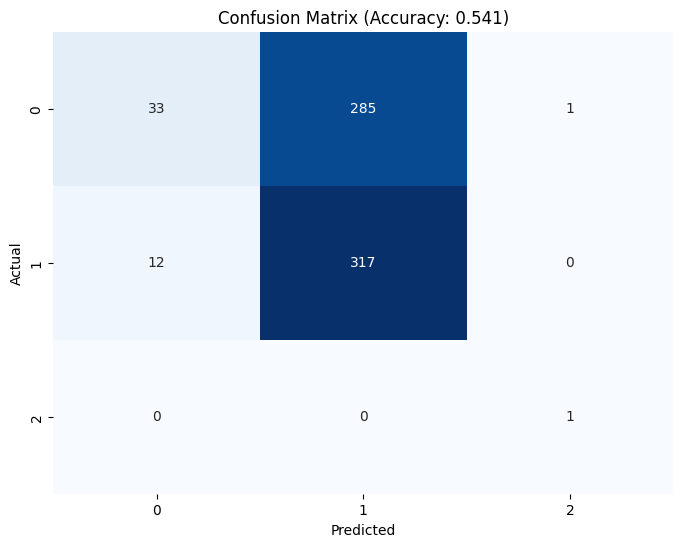

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Assuming you have predicted labels stored in y_pred and true labels stored in y_test

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.3f})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [103]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Assuming you have predicted labels stored in y_pred and true labels stored in y_test

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the evaluation metrics
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')


Precision: 0.6282
Recall: 0.5408
F1 Score: 0.4354
